In [1]:
# !pip install ultralytics

Run this cell as it is

In [2]:
import os
import glob
import yaml
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

class_name = { 0: 'Mass',
1: 'Spiculation',
2: 'Suspicious Calcification',
3: 'Architectural Distortion',
4: 'Asymmetry',
5: 'Focal Asymmetry',
6: 'Skin Thickening',
7: 'Global Asymmetry',
8: 'Suspicious Lymph Node',
9: 'Skin Retraction',
10: 'Nipple Retraction'
}

color_dict = {
    0: (255, 0, 0),      # Red
    1: (0, 255, 0),      # Green
    2: (0, 0, 255),      # Blue
    3: (255, 255, 0),    # Yellow
    4: (255, 165, 0),    # Orange
    5: (128, 0, 128),    # Purple
    6: (0, 255, 255),    # Cyan
    7: (255, 192, 203),  # Pink
    8: (128, 128, 0),    # Olive
    9: (0, 0, 0),        # Black
    10: (169, 169, 169)  # Dark Grey
}

E0000 00:00:1737308153.117280 1573520 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737308153.121529 1573520 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Run this cell as it is

In [3]:
def remove_cache_files(directory):
    cache_files = glob.glob(os.path.join(directory, "*.cache"))
    for cache_file in cache_files:
        os.remove(cache_file)
        print(f"Removed: {cache_file}")
        
with open("/home/rshah133/bcd/dataset.yaml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

remove_cache_files(os.path.dirname(data_loaded['train']))
remove_cache_files(os.path.dirname(data_loaded['val']))

Removed: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/train/labels.cache
Removed: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/val/labels.cache


Model Setup, Change the model and hyperparameters. Keep epochs atleast 50

In [ ]:
model = YOLO('yolov8n.yaml')
results = model.train(data = "/home/rshah133/bcd/dataset.yaml", epochs = 300, imgsz = 640, batch = 6, device = [0,1], patience = 20, save = True, save_period = 10, name = 'checkpoint', exist_ok = True, resume = True, iou = 0.9)

New https://pypi.org/project/ultralytics/8.3.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.58 🚀 Python-3.11.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-80GB, 81156MiB)
                                                      CUDA:1 (NVIDIA A100-SXM4-80GB, 81156MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/home/rshah133/bcd/dataset.yaml, epochs=300, time=None, patience=20, batch=6, imgsz=640, save=True, save_period=10, cache=False, device=[0, 1], workers=8, project=None, name=checkpoint, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=None, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visu

E0000 00:00:1737308161.616264 1573587 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737308161.620431 1573587 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorBoard: Start with 'tensorboard --logdir runs/detect/checkpoint', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=11
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/train/labels... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<00:00, 1127.64it/s]


train: New cache created: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/train/labels.cache


/home/rshah133/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/home/rshah133/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
val: Scanning /home/rshah133/breast_cancer_detection/train_val_birad

val: New cache created: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/val/labels.cache
Plotting labels to runs/detect/checkpoint/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000515625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 16 dataloader workers
Logging results to runs/detect/checkpoint
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300     0.583G      4.443      7.126      3.962         15        640: 100%|██████████| 19/19 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.07it/s]


                   all         21        140          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300     0.531G      4.524      5.417      4.143         28        640: 100%|██████████| 19/19 [00:02<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 33.29it/s]


                   all         21        140          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300     0.541G      4.443      5.324      4.065         30        640: 100%|██████████| 19/19 [00:01<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.96it/s]


                   all         21        140          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      0.51G      4.618      5.154      3.933         11        640: 100%|██████████| 19/19 [00:01<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:00<00:00, 18.22it/s]

                   all         21        140          0          0          0          0


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 22.21it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300     0.531G       4.41      4.783      3.814         31        640: 100%|██████████| 19/19 [00:01<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.57it/s]


                   all         21        140          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      0.52G      3.995      4.478      3.754         38        640: 100%|██████████| 19/19 [00:01<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.43it/s]


                   all         21        140          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300     0.541G      4.179      4.874      3.677          4        640: 100%|██████████| 19/19 [00:01<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 22.01it/s]


                   all         21        140          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      0.52G      3.843      4.318      3.617          7        640: 100%|██████████| 19/19 [00:01<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.99it/s]


                   all         21        140   0.000549     0.0186   0.000298   0.000103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      0.52G       3.88      4.477      3.467         27        640: 100%|██████████| 19/19 [00:01<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:00<00:00, 13.71it/s]

                   all         21        140   0.000968     0.0515    0.00714   0.000801


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      0.52G      3.935      4.121      3.286         22        640: 100%|██████████| 19/19 [00:01<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 34.77it/s]


                   all         21        140   0.000292     0.0125    0.00659   0.000669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300     0.524G      3.878      4.257      3.382         15        640: 100%|██████████| 19/19 [00:01<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 34.94it/s]


                   all         21        140   0.000672     0.0311    0.00688   0.000722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300     0.541G      3.758      4.024       3.26         13        640: 100%|██████████| 19/19 [00:01<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 22.88it/s]


                   all         21        140    0.00102     0.0528    0.00106   0.000244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300     0.526G      3.753      3.994      3.235         20        640: 100%|██████████| 19/19 [00:01<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.46it/s]


                   all         21        140      0.009     0.0555    0.00514     0.0015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      0.52G      3.692      3.927      3.327          6        640: 100%|██████████| 19/19 [00:01<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.76it/s]


                   all         21        140    0.00225     0.0458    0.00171   0.000567


     15/300     0.503G      3.669      3.445      3.257         11        640:  11%|█         | 2/19 [00:00<00:01, 12.76it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      0.52G      3.705      3.735      3.133         23        640: 100%|██████████| 19/19 [00:01<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 35.28it/s]


                   all         21        140      0.002      0.097    0.00299    0.00076

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300     0.514G      3.754      4.206       3.16         38        640: 100%|██████████| 19/19 [00:01<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 33.93it/s]


                   all         21        140    0.00255     0.0811    0.00267   0.000961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      0.52G      3.817      3.967      2.997         38        640: 100%|██████████| 19/19 [00:01<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 29.18it/s]


                   all         21        140    0.00146     0.0446    0.00251   0.000962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      0.52G      3.758      3.958       3.12         12        640: 100%|██████████| 19/19 [00:01<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.07it/s]


                   all         21        140    0.00202      0.073    0.00349   0.000756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300     0.524G      3.702      3.797      3.083         20        640: 100%|██████████| 19/19 [00:01<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 22.64it/s]


                   all         21        140     0.0022      0.118    0.00716    0.00211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300     0.541G      3.668      3.827      3.111         15        640: 100%|██████████| 19/19 [00:01<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.32it/s]


                   all         21        140     0.0274     0.0256     0.0044    0.00107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300     0.533G      3.653       3.57      2.894         19        640: 100%|██████████| 19/19 [00:01<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.45it/s]


                   all         21        140      0.152     0.0171     0.0055    0.00134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      0.52G      3.629      4.026      2.947          2        640: 100%|██████████| 19/19 [00:01<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.87it/s]


                   all         21        140      0.753    0.00571    0.00632    0.00136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      0.52G      3.524      3.948      2.963         15        640: 100%|██████████| 19/19 [00:01<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.76it/s]


                   all         21        140     0.0151     0.0245    0.00483    0.00114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300     0.526G      3.698       3.93       2.87         21        640: 100%|██████████| 19/19 [00:01<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 29.29it/s]


                   all         21        140     0.0138     0.0245    0.00483    0.00133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      0.52G      3.675       3.86      2.964         17        640: 100%|██████████| 19/19 [00:01<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.36it/s]


                   all         21        140    0.00568     0.0918    0.00953    0.00285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      0.52G      3.713      3.754      2.784         31        640: 100%|██████████| 19/19 [00:01<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.89it/s]


                   all         21        140    0.00319      0.174     0.0113    0.00278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300     0.514G      3.589      3.495      2.832         10        640: 100%|██████████| 19/19 [00:01<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.28it/s]


                   all         21        140     0.0247     0.0489    0.00931    0.00186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300     0.541G       3.63      3.483      2.855         34        640: 100%|██████████| 19/19 [00:01<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.08it/s]


                   all         21        140     0.0121      0.017    0.00898     0.0019

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      0.52G      3.567      3.503      2.907         37        640: 100%|██████████| 19/19 [00:01<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.60it/s]


                   all         21        140     0.0359     0.0409      0.012    0.00343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300     0.524G      3.617      3.835      2.958         11        640: 100%|██████████| 19/19 [00:01<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.03it/s]


                   all         21        140      0.013     0.0408    0.00467    0.00181


     31/300      0.52G      1.968      16.14      1.419          0        640:  11%|█         | 2/19 [00:00<00:01, 10.99it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300     0.541G      3.494      5.085      2.674         24        640: 100%|██████████| 19/19 [00:01<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.02it/s]


                   all         21        140     0.0411     0.0273     0.0102    0.00308


     32/300     0.499G       3.68      3.746      3.191         28        640:  11%|█         | 2/19 [00:00<00:01, 12.99it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      0.52G      3.575      3.636      2.904         20        640: 100%|██████████| 19/19 [00:01<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.93it/s]


                   all         21        140     0.0298      0.025     0.0103    0.00319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300     0.524G      3.633      3.455      2.875         17        640: 100%|██████████| 19/19 [00:01<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.04it/s]


                   all         21        140     0.0374     0.0165     0.0106    0.00289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      0.52G      3.607      3.492      2.835         19        640: 100%|██████████| 19/19 [00:01<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.49it/s]


                   all         21        140      0.038     0.0255     0.0187    0.00655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300     0.526G      3.615      3.502      2.782         18        640: 100%|██████████| 19/19 [00:01<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.72it/s]


                   all         21        140     0.0591     0.0196     0.0188    0.00724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      0.52G      3.583      3.487      2.759         38        640: 100%|██████████| 19/19 [00:01<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.38it/s]


                   all         21        140    0.00346      0.163     0.0105     0.0031

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      0.52G       3.42      3.513      2.811         17        640: 100%|██████████| 19/19 [00:01<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.33it/s]


                   all         21        140      0.313     0.0493     0.0159     0.0042

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300     0.516G      3.501      3.614      2.721         17        640: 100%|██████████| 19/19 [00:01<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:00<00:00, 20.91it/s]

                   all         21        140      0.157     0.0737     0.0101     0.0042


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      0.52G      3.458      3.422       2.76         13        640: 100%|██████████| 19/19 [00:01<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.89it/s]


                   all         21        140     0.0026      0.109    0.00378    0.00129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      0.52G      3.409      3.406      2.852         33        640: 100%|██████████| 19/19 [00:01<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.43it/s]


                   all         21        140      0.165      0.035    0.00849    0.00236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300     0.524G      3.455      3.581      2.805         14        640: 100%|██████████| 19/19 [00:01<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.41it/s]


                   all         21        140      0.171     0.0124     0.0134    0.00605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      0.52G       3.31      3.325      2.754         26        640: 100%|██████████| 19/19 [00:01<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:00<00:00, 19.45it/s]

                   all         21        140      0.177     0.0255     0.0159    0.00647


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      0.52G      3.282      3.287      2.646         14        640: 100%|██████████| 19/19 [00:01<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.78it/s]


                   all         21        140      0.171     0.0215     0.0238     0.0108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300     0.524G      3.304      3.272      2.794         18        640: 100%|██████████| 19/19 [00:01<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.46it/s]


                   all         21        140      0.317    0.00571     0.0163    0.00596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      0.52G       3.29      3.271      2.747         24        640: 100%|██████████| 19/19 [00:01<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.65it/s]


                   all         21        140      0.475     0.0131     0.0246    0.00809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300     0.524G      3.254      3.281      2.749         37        640: 100%|██████████| 19/19 [00:01<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 22.58it/s]


                   all         21        140      0.321    0.00739     0.0173    0.00367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300     0.541G      3.251      3.258      2.641         15        640: 100%|██████████| 19/19 [00:01<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.27it/s]


                   all         21        140     0.0476    0.00739     0.0128    0.00334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      0.52G      3.252      3.288      2.619         22        640: 100%|██████████| 19/19 [00:01<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.59it/s]


                   all         21        140     0.0113      0.324      0.065     0.0263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300     0.514G      3.283      3.565      2.624         16        640: 100%|██████████| 19/19 [00:01<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.63it/s]


                   all         21        140      0.312     0.0358     0.0276     0.0118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      0.52G      3.228      3.239      2.578         13        640: 100%|██████████| 19/19 [00:01<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.63it/s]


                   all         21        140      0.334     0.0358      0.037     0.0123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300     0.541G      3.329       3.29       2.61         34        640: 100%|██████████| 19/19 [00:01<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.04it/s]


                   all         21        140      0.455      0.034     0.0687     0.0209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300     0.524G      3.253      3.167      2.757         21        640: 100%|██████████| 19/19 [00:01<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.72it/s]


                   all         21        140     0.0398      0.344     0.0962     0.0172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      0.52G      3.161      3.175      2.511          5        640: 100%|██████████| 19/19 [00:01<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 34.36it/s]


                   all         21        140      0.615     0.0608     0.0306     0.0116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      0.52G      3.166      3.191      2.483         39        640: 100%|██████████| 19/19 [00:01<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.25it/s]


                   all         21        140      0.613     0.0693     0.0281     0.0108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300     0.524G      3.261        3.3      2.463         19        640: 100%|██████████| 19/19 [00:01<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 30.33it/s]


                   all         21        140      0.177     0.0574     0.0255    0.00708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300     0.518G      3.223      3.317      2.628          1        640: 100%|██████████| 19/19 [00:01<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.92it/s]


                   all         21        140      0.343     0.0556       0.03    0.00893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300     0.524G       3.31      3.181      2.586         11        640: 100%|██████████| 19/19 [00:01<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.50it/s]


                   all         21        140      0.504       0.05     0.0307     0.0109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300     0.541G      3.184      3.054      2.547         14        640: 100%|██████████| 19/19 [00:01<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.30it/s]


                   all         21        140     0.0407      0.357      0.177      0.068


     59/300     0.499G      3.201      2.939      2.519         49        640:  11%|█         | 2/19 [00:00<00:01, 12.27it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      0.52G      3.208      3.199      2.473         15        640: 100%|██████████| 19/19 [00:01<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.97it/s]


                   all         21        140      0.646     0.0597      0.037     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300     0.514G      2.955      3.109      2.488          8        640: 100%|██████████| 19/19 [00:01<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.63it/s]


                   all         21        140      0.637     0.0369     0.0351     0.0124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      0.52G       3.09       3.33       2.37         11        640: 100%|██████████| 19/19 [00:01<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.62it/s]


                   all         21        140      0.633     0.0475     0.0388      0.013

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      0.52G      3.116       2.98      2.523         22        640: 100%|██████████| 19/19 [00:01<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.00it/s]


                   all         21        140      0.628     0.0534     0.0411     0.0148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300     0.524G      3.141      2.939      2.481         14        640: 100%|██████████| 19/19 [00:01<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:00<00:00, 22.75it/s]

                   all         21        140      0.648     0.0745      0.117     0.0451


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      0.52G      3.141      2.951       2.51         32        640: 100%|██████████| 19/19 [00:01<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.42it/s]


                   all         21        140     0.0407      0.362      0.169     0.0651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      0.52G      3.086      3.105      2.683         19        640: 100%|██████████| 19/19 [00:01<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 29.44it/s]


                   all         21        140      0.624     0.0408     0.0369     0.0109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300     0.524G      3.021      3.059      2.529         24        640: 100%|██████████| 19/19 [00:01<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 29.80it/s]


                   all         21        140      0.644     0.0505     0.0694     0.0243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300     0.541G       3.02      2.968      2.432         13        640: 100%|██████████| 19/19 [00:01<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 31.37it/s]


                   all         21        140      0.611     0.0198       0.02    0.00534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300     0.524G       3.05      3.172      2.479          8        640: 100%|██████████| 19/19 [00:01<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.26it/s]


                   all         21        140      0.482     0.0539     0.0288    0.00693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300     0.522G      2.983      3.009      2.436         25        640: 100%|██████████| 19/19 [00:01<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 36.11it/s]


                   all         21        140      0.628     0.0455     0.0274     0.0099

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300     0.522G      3.053      3.087      2.443         14        640: 100%|██████████| 19/19 [00:01<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.12it/s]


                   all         21        140      0.461     0.0353     0.0315    0.00832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300     0.514G      3.031       2.98      2.438         14        640: 100%|██████████| 19/19 [00:01<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 29.54it/s]


                   all         21        140      0.612      0.058     0.0382     0.0127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      0.52G      3.053      3.098      2.396         26        640: 100%|██████████| 19/19 [00:01<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.86it/s]


                   all         21        140      0.605     0.0108     0.0153    0.00606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300     0.522G      2.926        2.9      2.353         30        640: 100%|██████████| 19/19 [00:01<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

                   all         21        140      0.638     0.0165     0.0256    0.00914


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300     0.524G      3.031      3.176      2.405         20        640: 100%|██████████| 19/19 [00:01<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.30it/s]


                   all         21        140       0.68     0.0858     0.0687     0.0292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300     0.518G      2.912      3.076      2.523          5        640: 100%|██████████| 19/19 [00:01<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.70it/s]


                   all         21        140      0.627     0.0654     0.0351     0.0113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      0.52G      2.911      2.993      2.315         24        640: 100%|██████████| 19/19 [00:01<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.16it/s]


                   all         21        140      0.611     0.0647     0.0273    0.00898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300     0.524G      3.031      3.071      2.424         10        640: 100%|██████████| 19/19 [00:01<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.95it/s]


                   all         21        140      0.623     0.0829     0.0339     0.0112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300     0.541G      2.914      2.866       2.32         16        640: 100%|██████████| 19/19 [00:01<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 37.91it/s]


                   all         21        140      0.647     0.0673     0.0479     0.0173
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 58, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

78 epochs completed in 0.055 hours.
Optimizer stripped from runs/detect/checkpoint/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/checkpoint/weights/best.pt, 6.2MB

Validating runs/detect/checkpoint/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.11.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-80GB, 81156MiB)
                                                      CUDA:1 (NVIDIA A100-SXM4-80GB, 81156MiB)
YOLOv8n summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.97it/s]


                   all         21        140     0.0406      0.357      0.177     0.0681
                  Mass         18         25     0.0212       0.72      0.185     0.0605
           Spiculation         21         85    0.00674      0.306     0.0329     0.0103
Suspicious Calcification         14         21    0.00656      0.476     0.0298    0.00788
       Skin Thickening          1          1          0          0          0          0
      Global Asymmetry          1          1       0.25          1      0.995      0.398
 Suspicious Lymph Node          6          6          0          0          0          0
       Skin Retraction          1          1          0          0          0          0
Speed: 0.1ms preprocess, 4.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/checkpoint


Run this cell as it is

In [5]:
with open("/home/rshah133/bcd/test_dataset.yaml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

remove_cache_files(os.path.dirname(data_loaded['train']))
remove_cache_files(os.path.dirname(data_loaded['val']))

Removed: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/train/labels.cache


## Change path and mention the latest train folder generated

* For eg. '/home/rshah133/bcd/runs/detect/train/weights/best.pt'
* I have train as the latest file. Next time I run the code it would change to train2. 
* So please check and change this everytime you run the code

In [6]:
best_model_path = 'runs/detect/checkpoint/weights/best.pt'

Predicting on test data

In [ ]:
best_model = YOLO(best_model_path)

test_img_path = data_loaded['val']
results = best_model.predict(source = test_img_path, save = True,  save_txt = True,  conf = 0.15)


image 1/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/1560345de7d8277b170ca3842eae6c97_e751e5a947089704457741eea74c2280.jpg: 640x512 (no detections), 28.3ms
image 2/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/21ee099d74242fca1551adb6f2564a15_b73d4e04b69d52ba6f350cc77da54f95.jpg: 640x512 (no detections), 5.6ms
image 3/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/2dfe6025d5954c2925d6288b50dccbea_a20301f2d2cafec6419d759fa7c70c0b.jpg: 640x480 3 Masss, 14 Spiculations, 26.2ms
image 4/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/3b9d3e9aa2fcdefd74d4cbfb496694b4_6c571a3fb5a3abe21141333f65b5bf09.jpg: 640x512 2 Masss, 5.8ms
image 5/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/43a5db0fd868e525cf75aaf5d53a1863_493609b26e1341ce737a60b5b930a757.jpg: 640x512 (no detections), 5.1ms
image 6/24 /home/rsha

Run this cell as it is and take screenshot of the output. This code is for calculating the metrics for test data

In [8]:
metrics = best_model.val(data = '/home/rshah133/bcd/test_dataset.yaml', conf = 0.15)

Ultralytics 8.3.58 🚀 Python-3.11.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-80GB, 81156MiB)


val: Scanning /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 1011.99it/s]

val: New cache created: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/labels.cache



/home/rshah133/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


                   all         24        148     0.0887     0.0378     0.0623     0.0231
                  Mass         15         17      0.167      0.176       0.17      0.065
           Spiculation         24         86      0.188     0.0349      0.121     0.0194
Suspicious Calcification         20         31      0.444      0.129      0.269      0.124
Architectural Distortion          1          1          0          0          0          0
       Skin Thickening          1          1          0          0          0          0
      Global Asymmetry          1          1          0          0          0          0
 Suspicious Lymph Node          7          8          0          0          0          0
       Skin Retraction          1          1          0          0          0          0
     Nipple Retraction          2          2          0          0          0          0
Speed: 0.1ms preprocess, 5.3ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/de

## Change the directory of the variable below

* predictions_dir = Directory for the predicted labels. Eg:- "runs/detect/predict/labels" 
* Here predict is variable and can change to predict2, predict3 etc everytime you run it. So change it everytime

In [9]:
predictions_dir = "runs/detect/predict/labels"   

Run this cell as it is

In [10]:
test_images_dir = data_loaded['val']
test_labels_dir = os.path.join(os.path.dirname(data_loaded['val']), 'labels')


output_labels_dir = "results/labels"  # Directory to save ground truth images
output_pred_dir = "results/predictions"  # Directory to save predicted images

# Create output directory if it doesn't exist
os.makedirs(output_labels_dir, exist_ok=True)
os.makedirs(output_pred_dir, exist_ok=True)

# Function to read YOLO format labels
def read_yolo_labels(label_file):
    labels = []
    with open(label_file, "r") as f:
        for line in f:
            parts = line.strip().split()
            class_id, x_center, y_center, width, height = map(float, parts[:5])
            confidence = float(parts[5]) if len(parts) > 5 else None
            labels.append((int(class_id), x_center, y_center, width, height, confidence))
    return labels

# Function to draw bounding boxes on images
def draw_boxes(image, boxes):
    h, w, _ = image.shape
    for box in boxes:
        class_id, x_center, y_center, width, height, confidence = box
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)
        # Draw rectangle
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color_dict[class_id], 2)
    return image

# Loop through each image
for image_file in os.listdir(test_images_dir):
    if image_file.endswith((".jpg", ".png", ".jpeg")):
        base_name = os.path.splitext(image_file)[0]
        image_path = os.path.join(test_images_dir, image_file)

        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading {image_file}")
            continue

        # Read ground truth labels
        ground_truth_file = os.path.join(test_labels_dir, f"{base_name}.txt")
        ground_truth_boxes = read_yolo_labels(ground_truth_file) if os.path.exists(ground_truth_file) else []

        # Read prediction labels
        prediction_file = os.path.join(predictions_dir, f"{base_name}.txt")
        prediction_boxes = read_yolo_labels(prediction_file) if os.path.exists(prediction_file) else []

        # Draw ground truth (green) and predictions (blue)
        image_with_boxes_gt = draw_boxes(image.copy(), ground_truth_boxes)
        image_with_boxes_pt = draw_boxes(image.copy(), prediction_boxes)

        # Save annotated image
        gt_output_path = os.path.join(output_labels_dir, image_file)
        cv2.imwrite(gt_output_path, image_with_boxes_gt)

        pt_output_path = os.path.join(output_pred_dir, image_file)
        cv2.imwrite(pt_output_path, image_with_boxes_pt)

print("Done saving the predictions")

Done saving the predictions


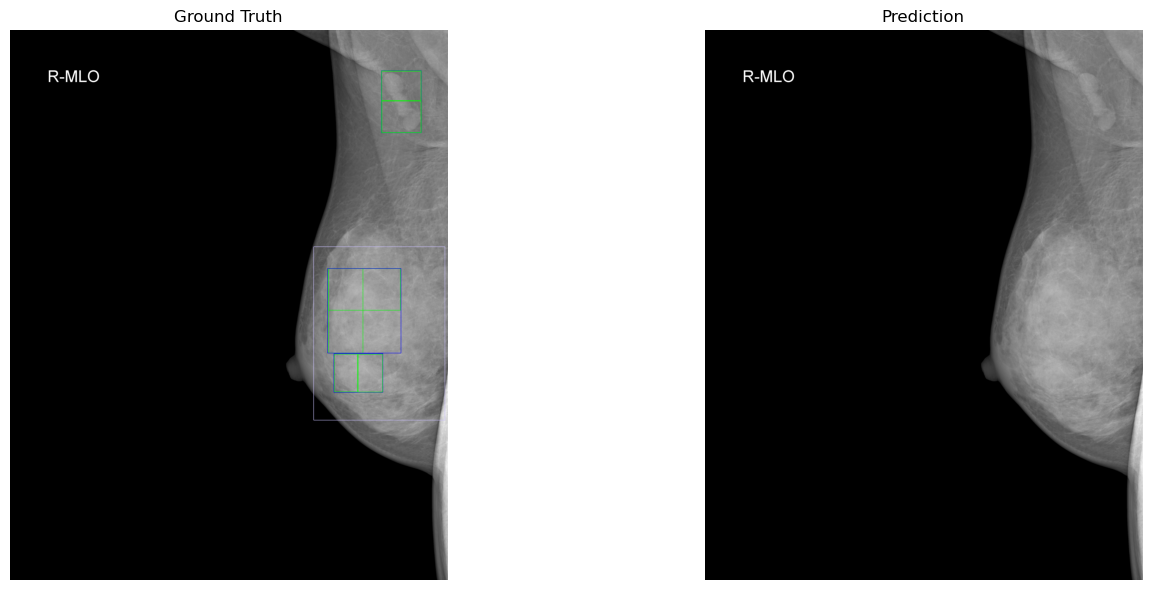

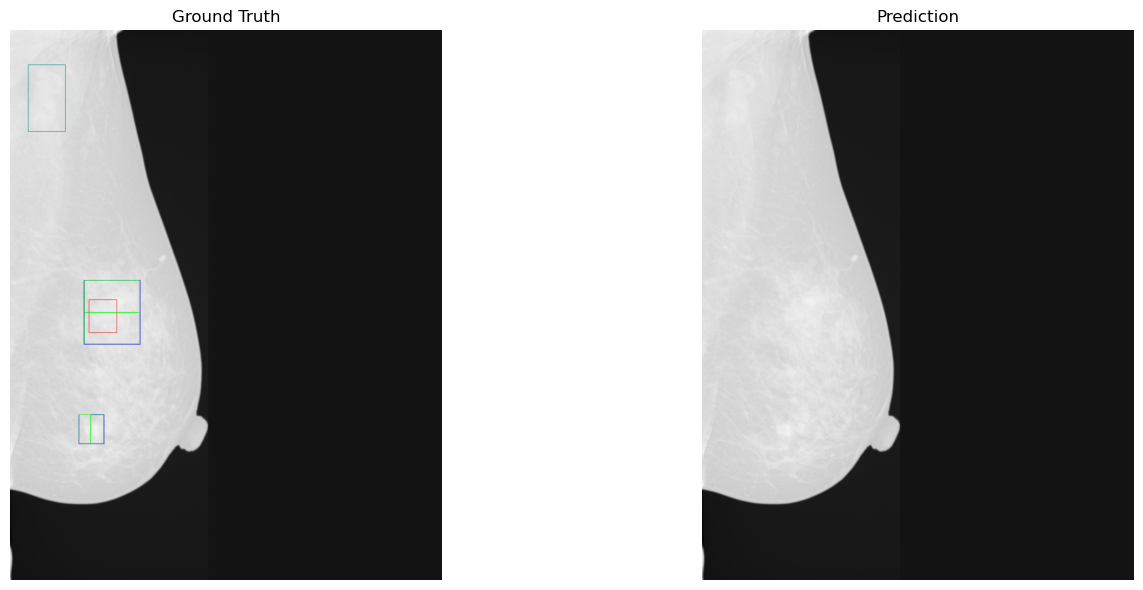

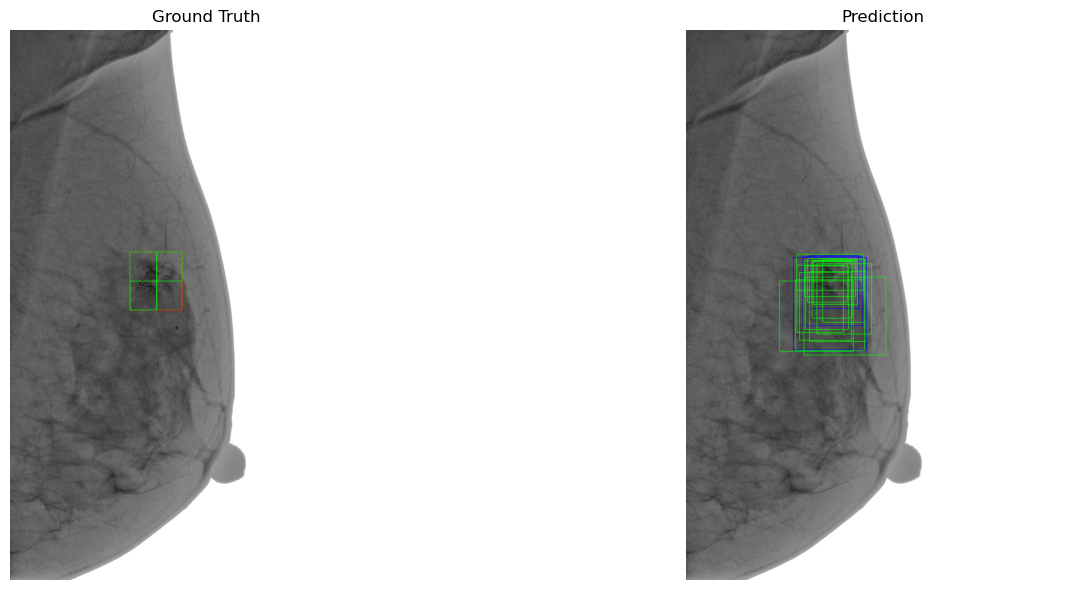

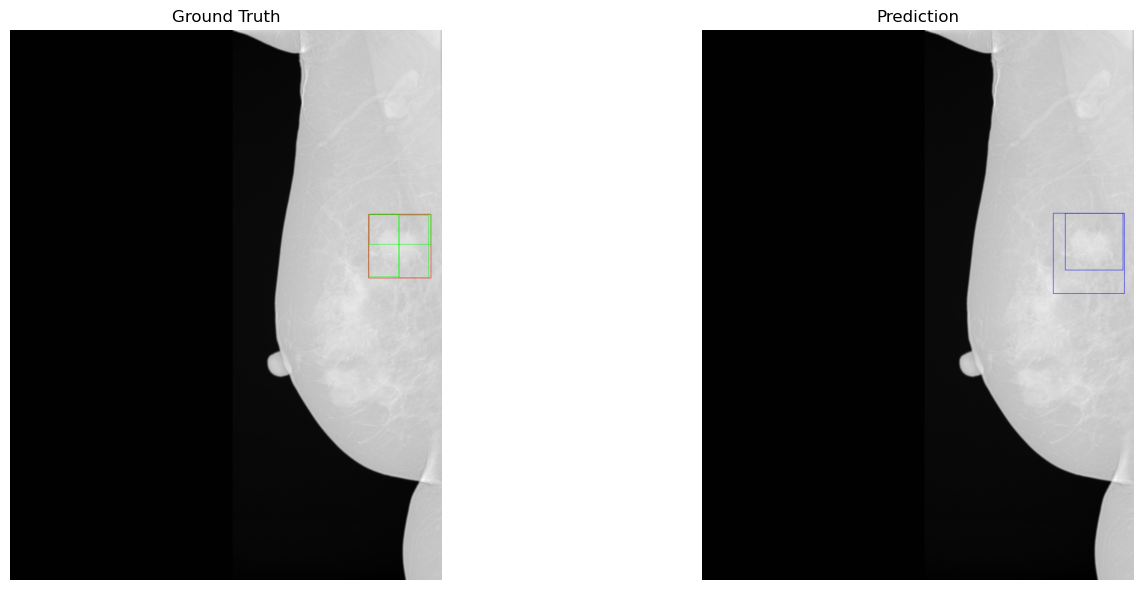

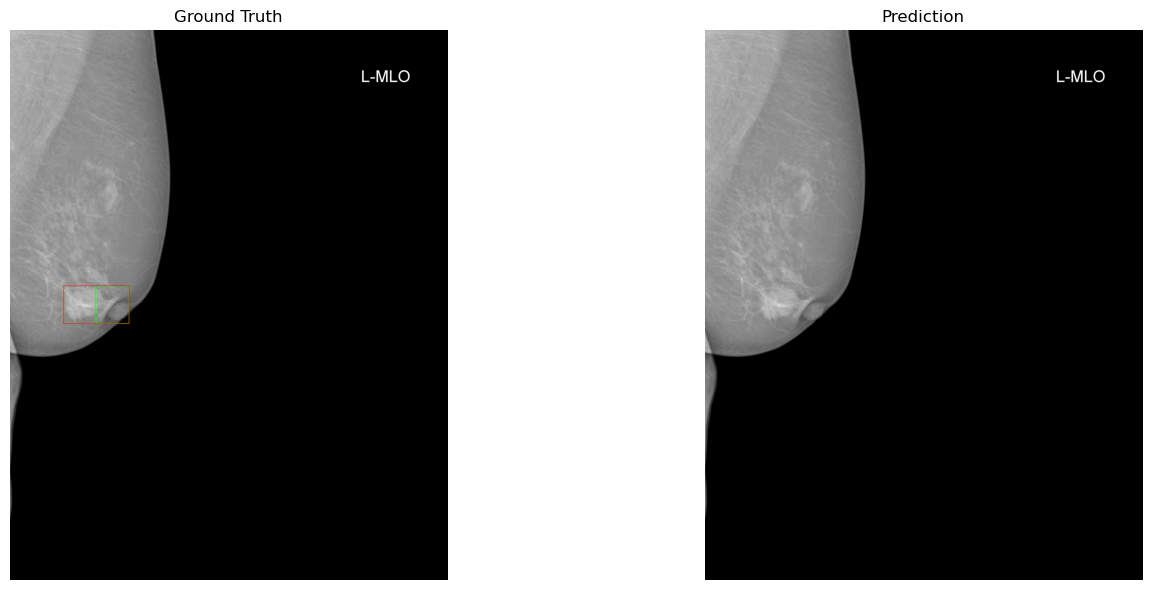

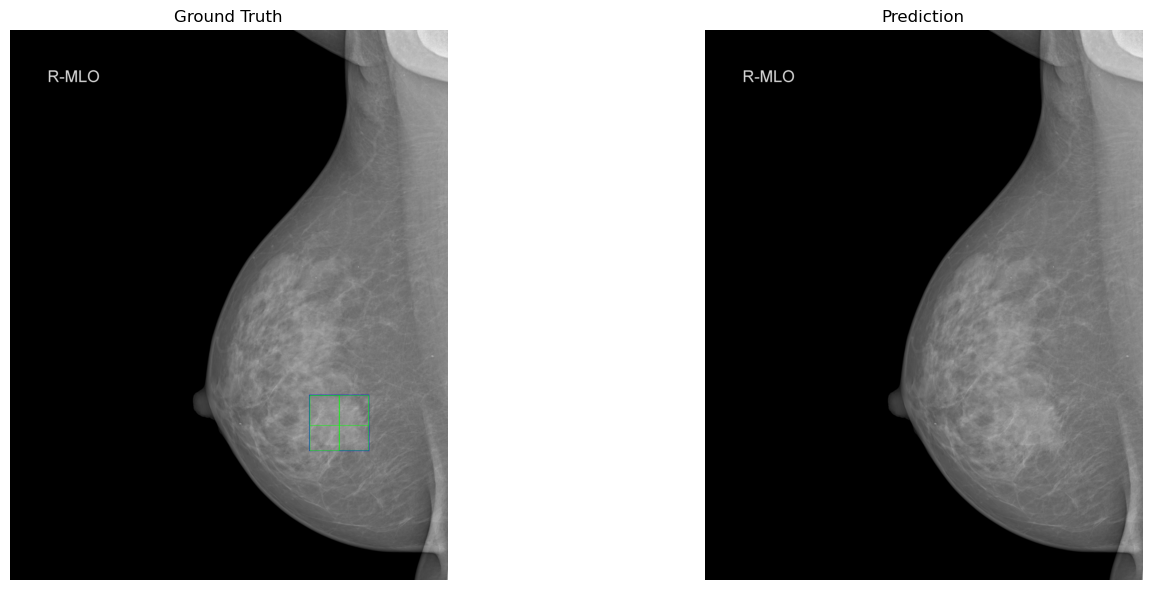

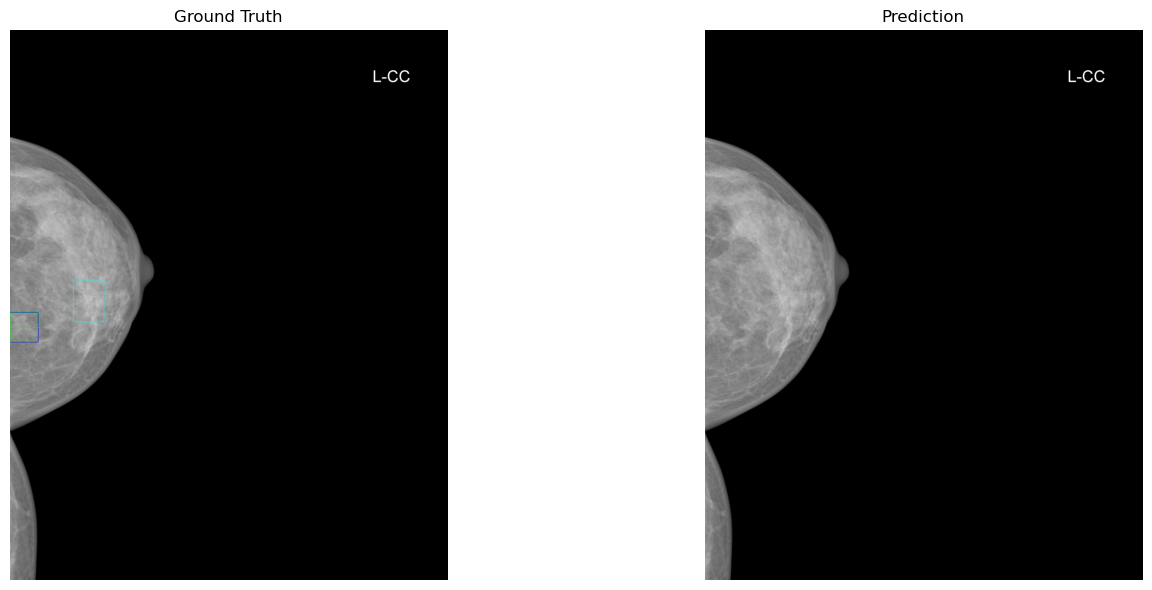

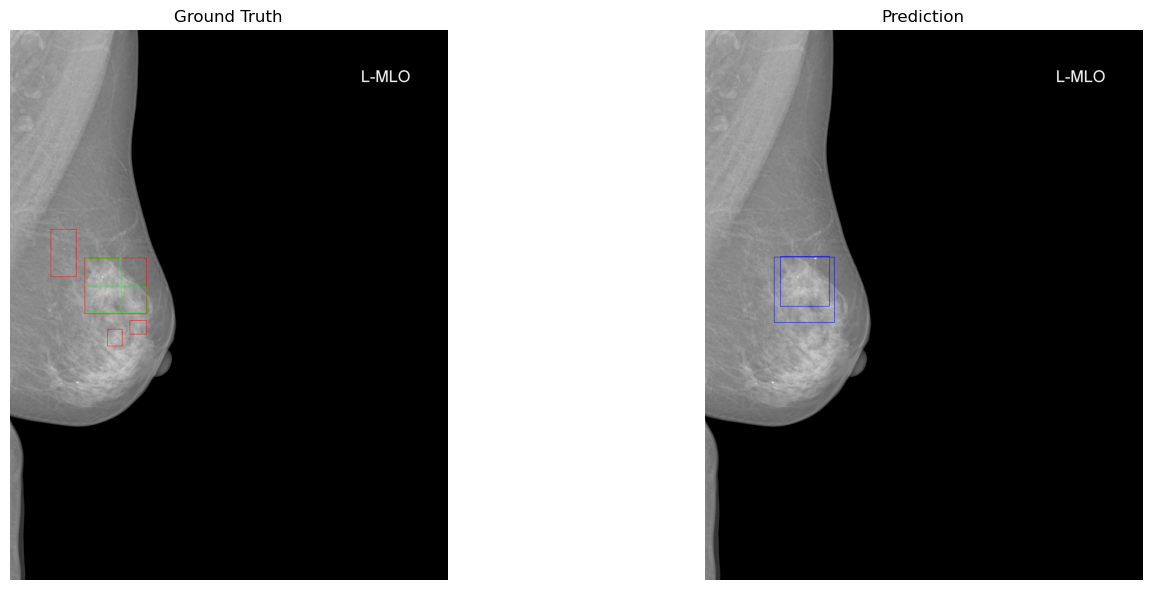

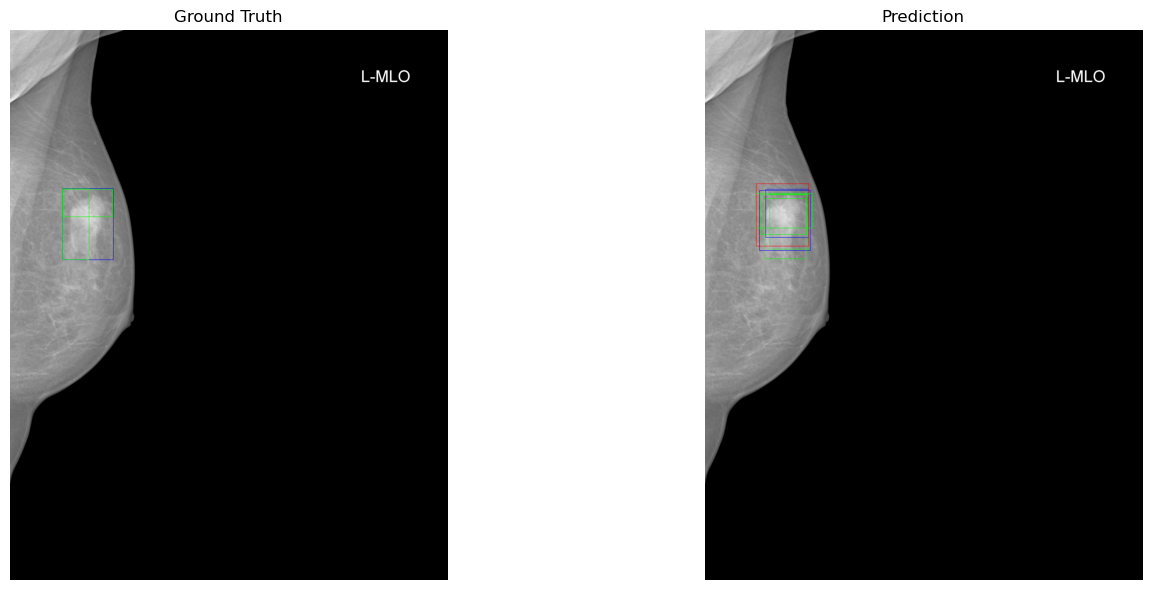

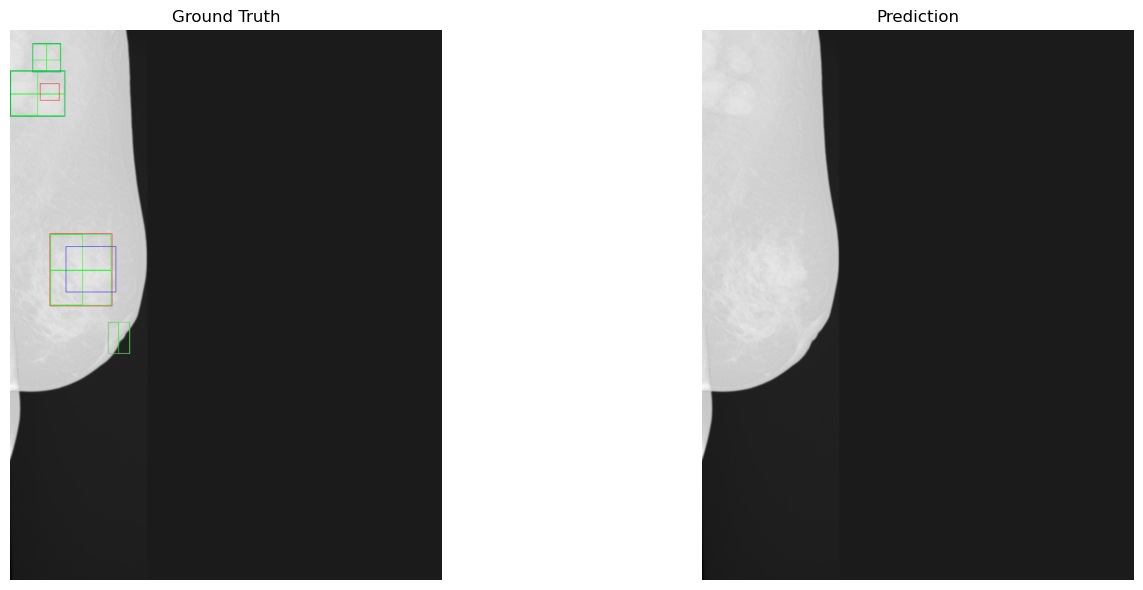

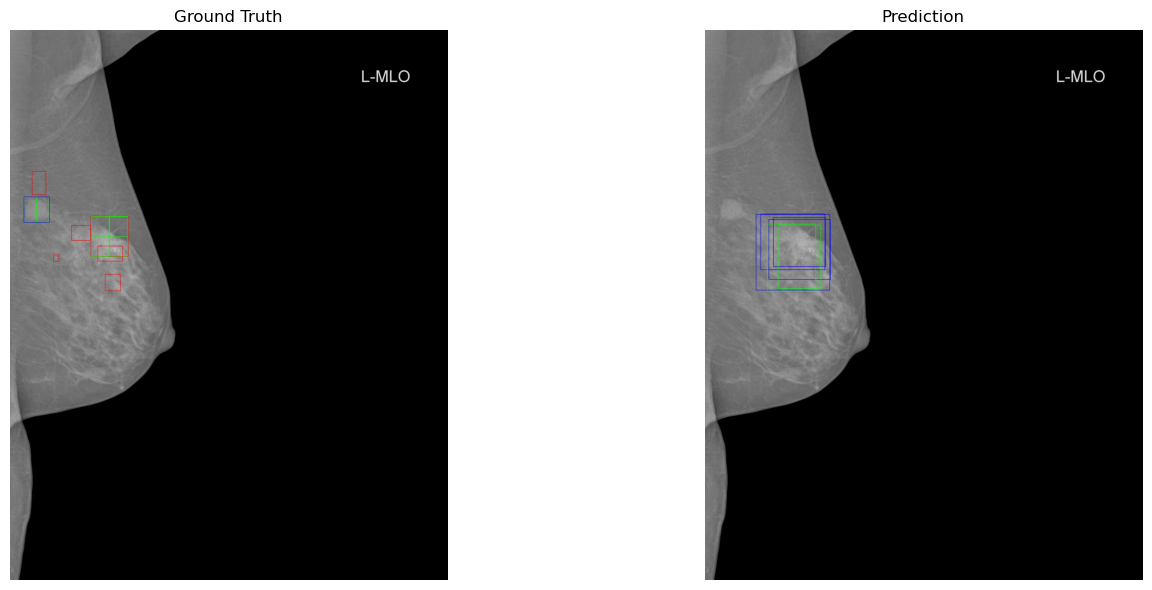

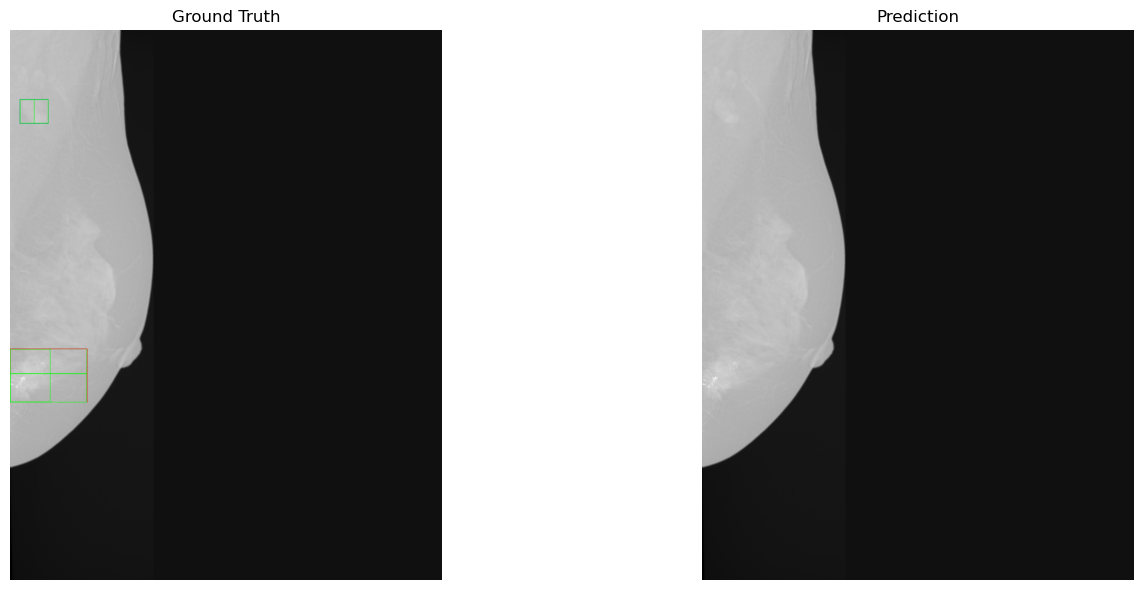

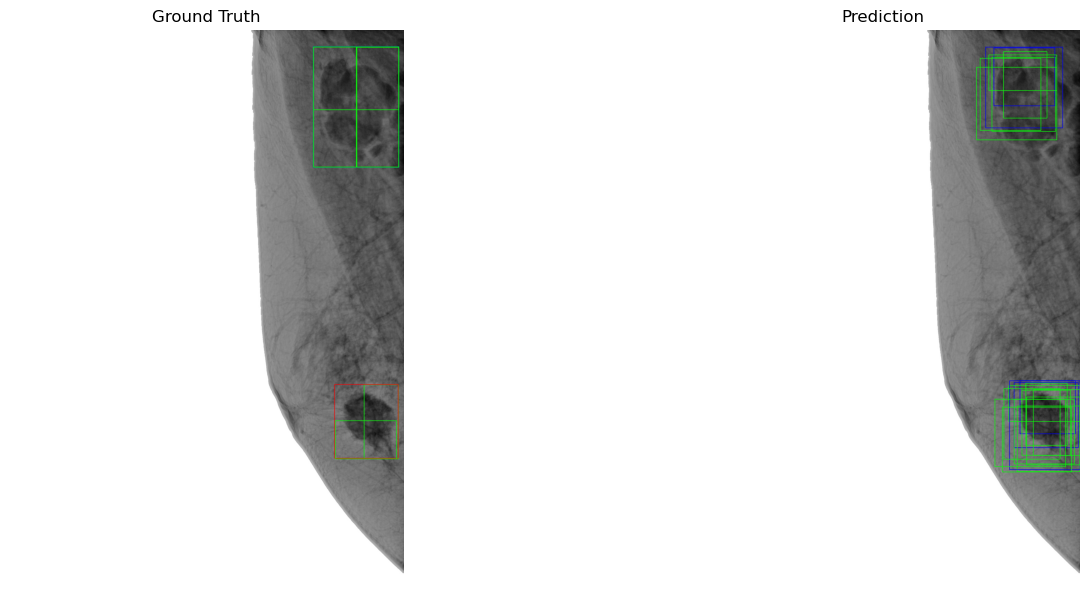

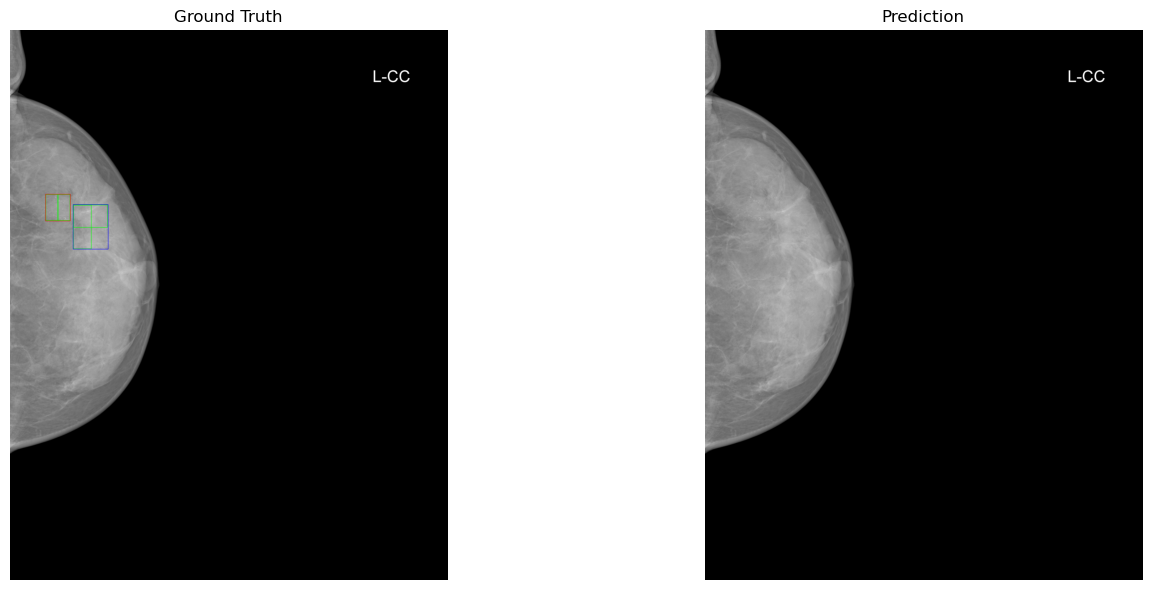

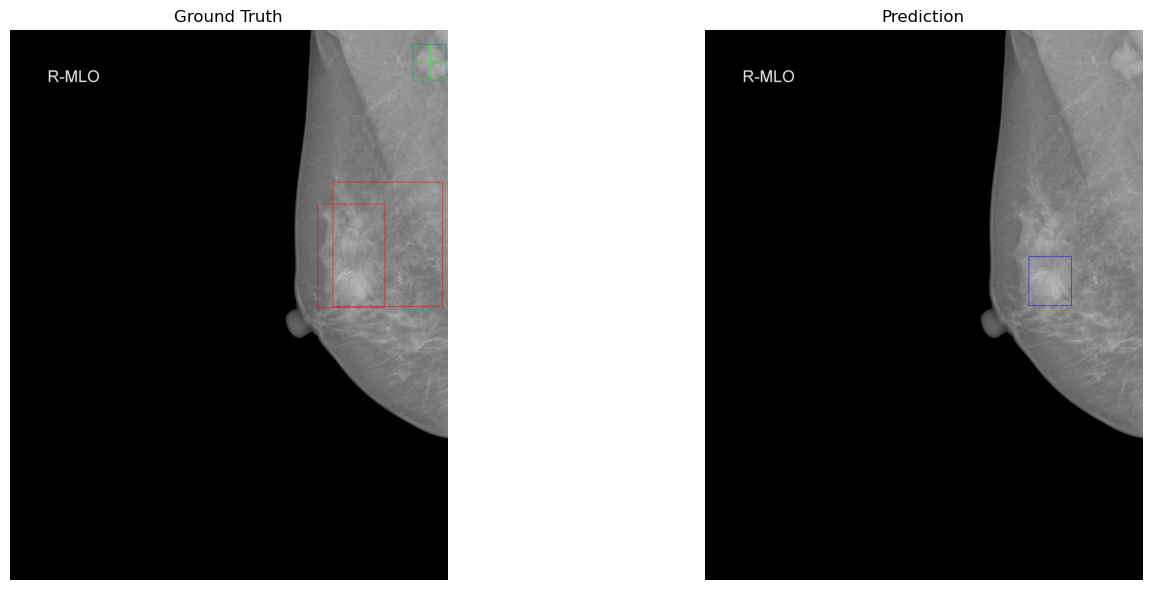

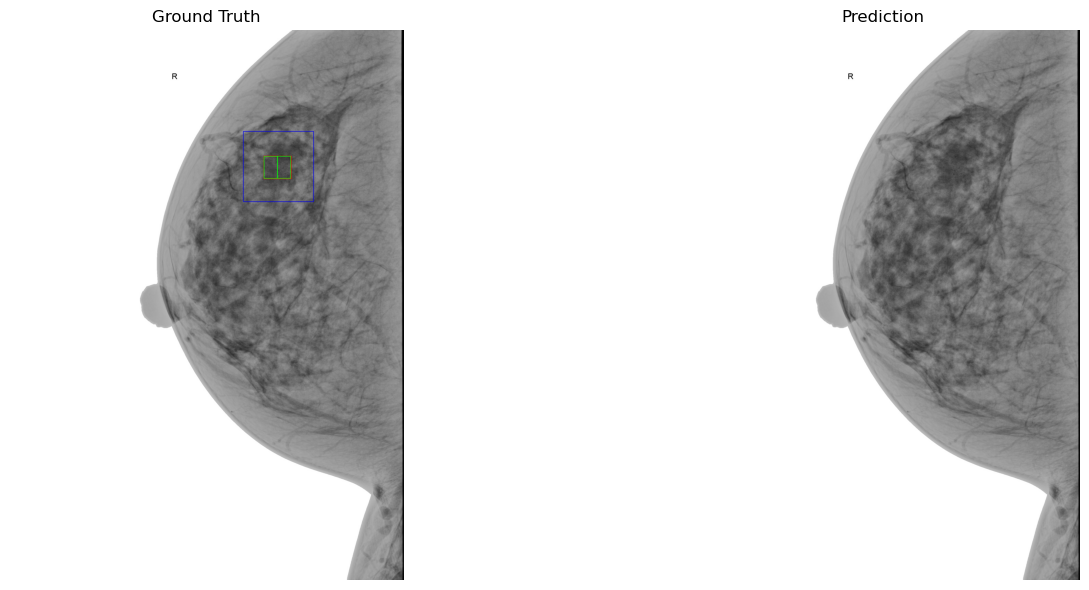

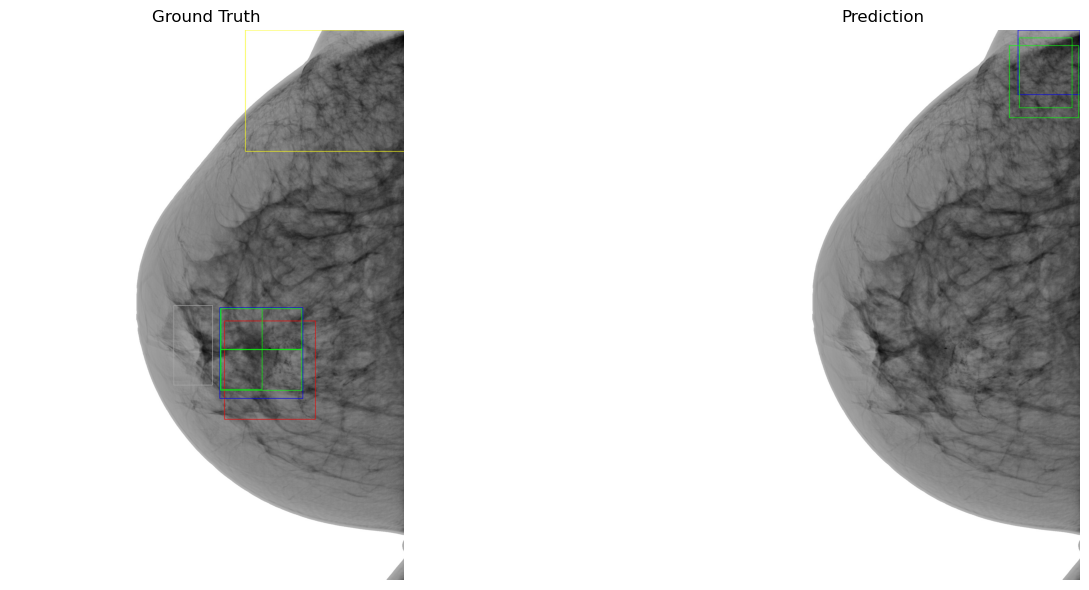

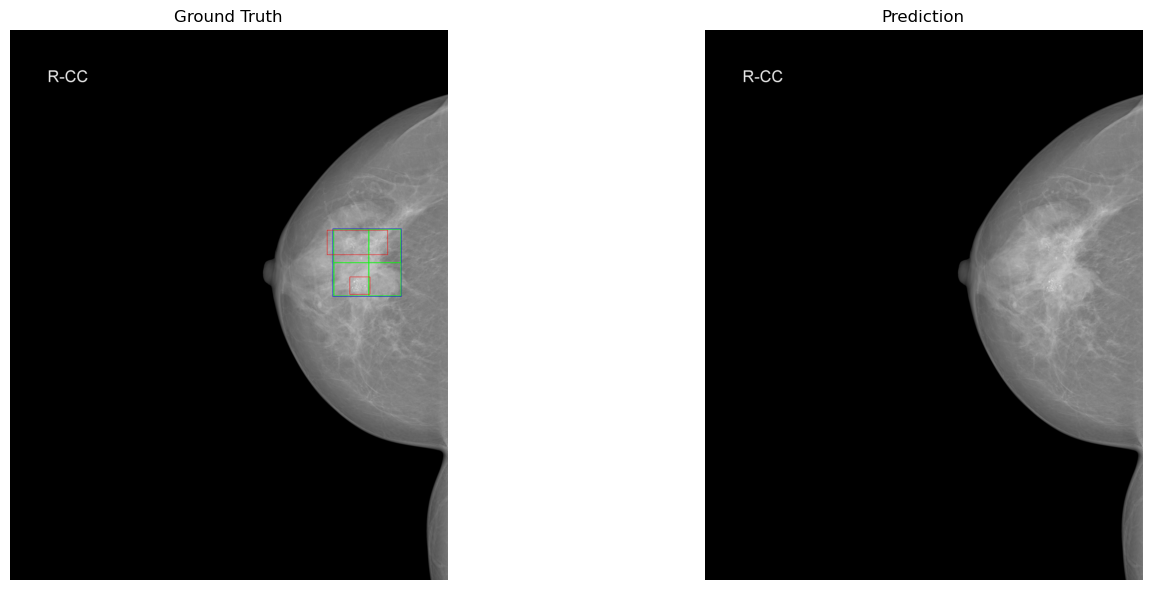

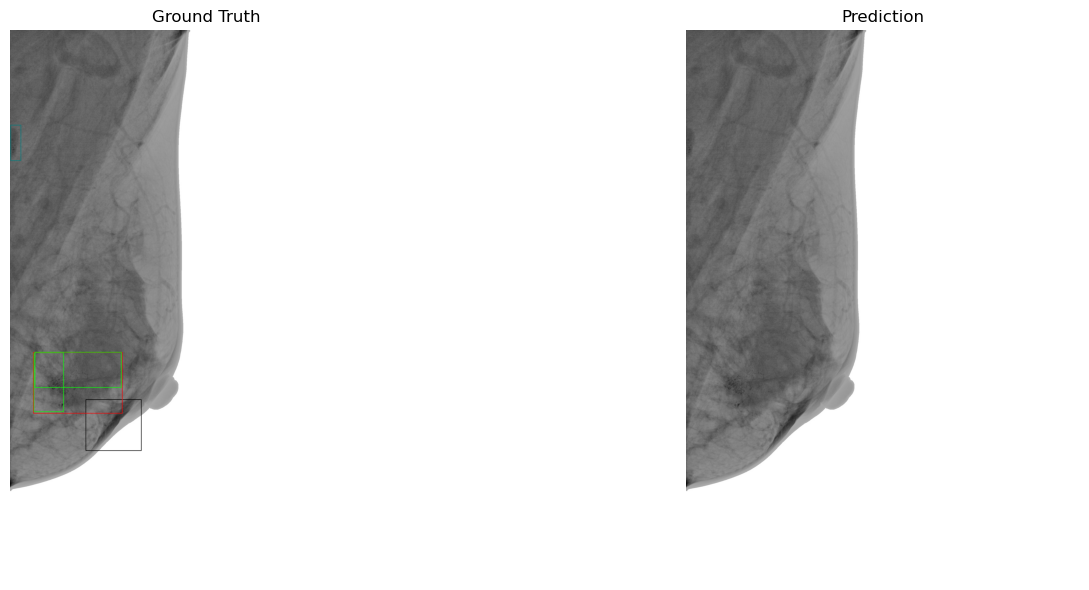

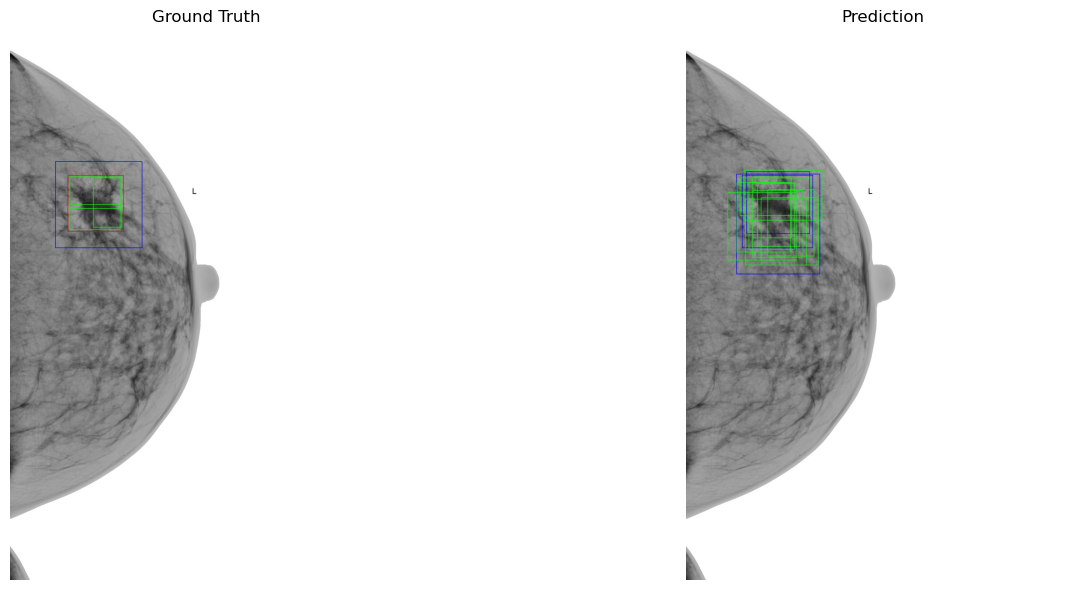

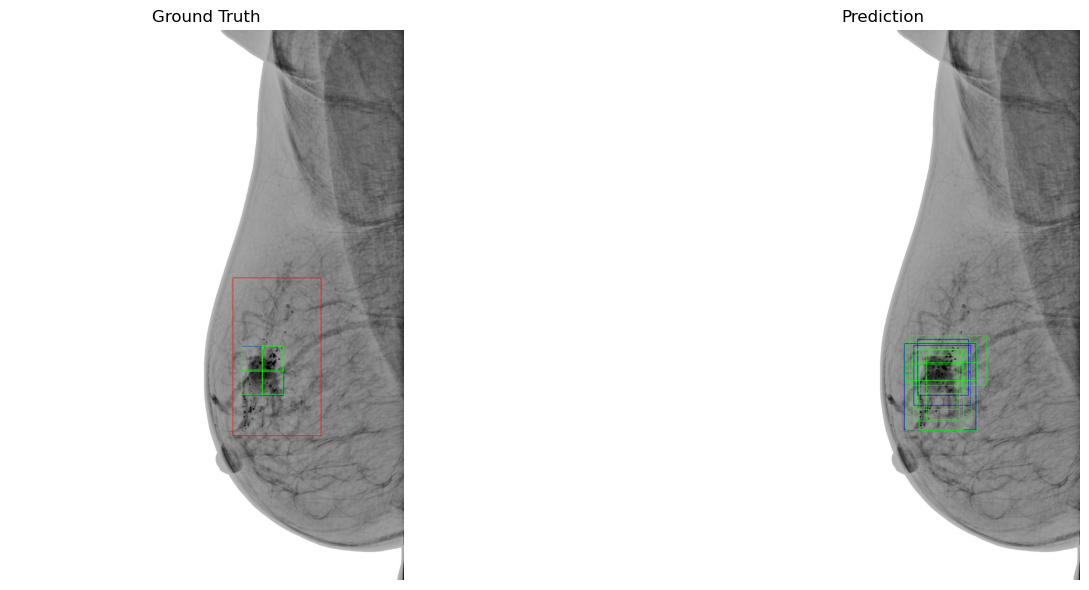

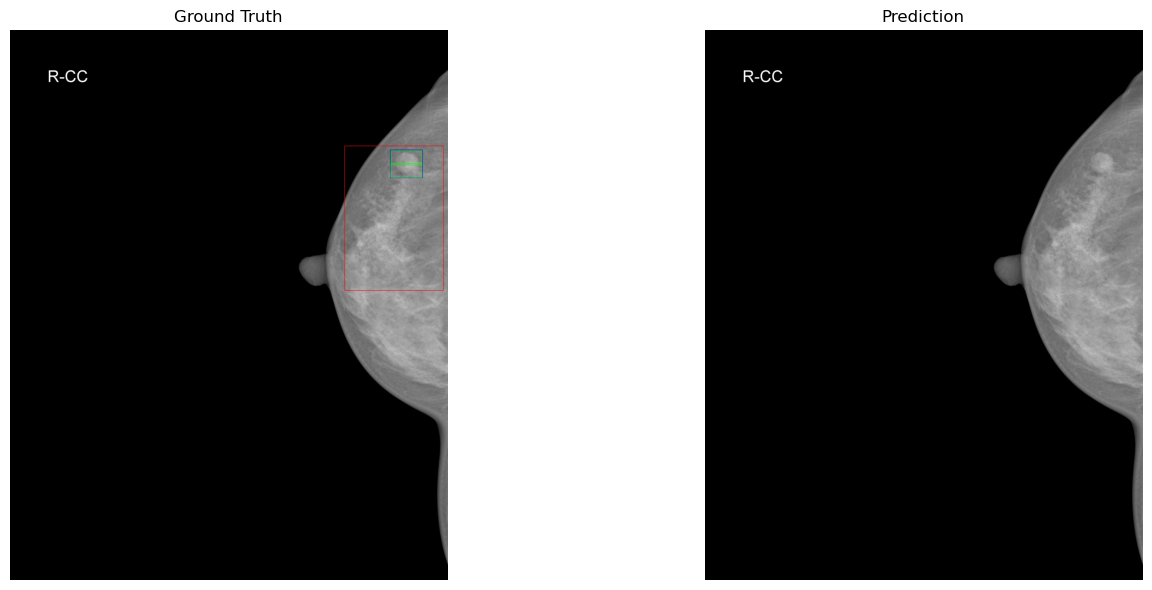

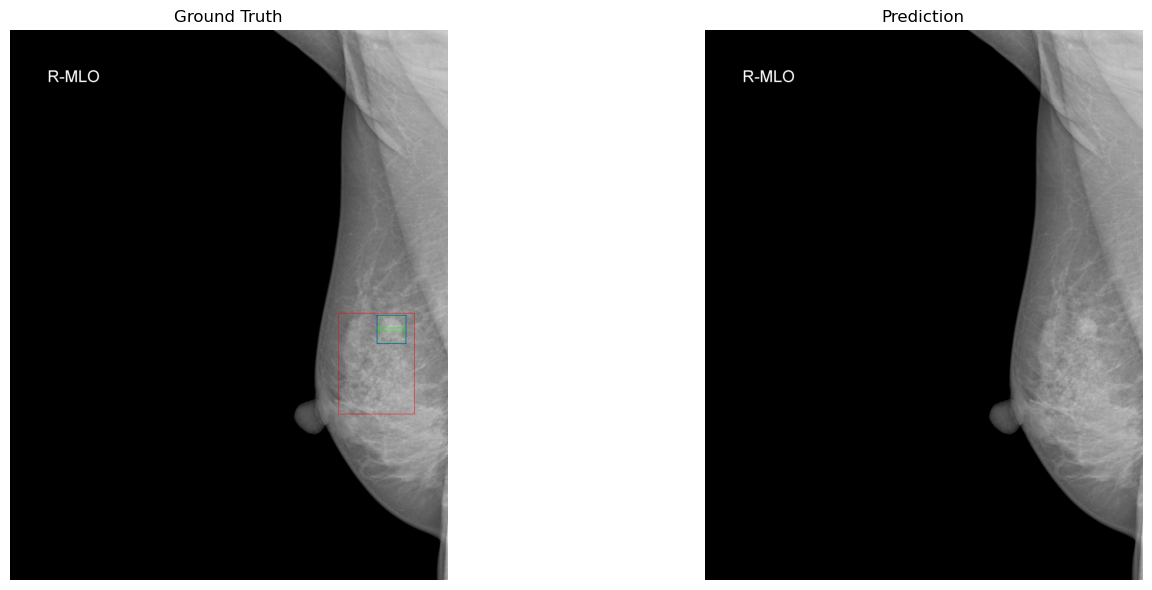

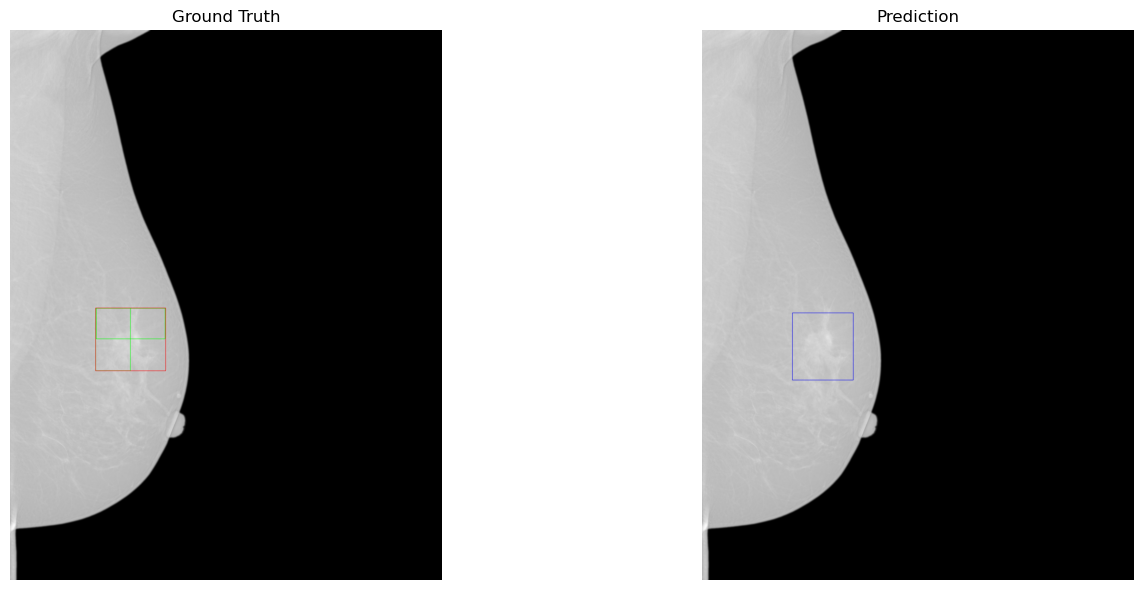

In [11]:
%matplotlib inline

output_labels_file_names = sorted(os.listdir(output_labels_dir))
output_pred_file_names = sorted(os.listdir(output_pred_dir))

for label_file, pred_file in zip(output_labels_file_names, output_pred_file_names):
    label_img = cv2.imread(os.path.join(output_labels_dir, label_file))
    pred_img = cv2.imread(os.path.join(output_pred_dir, pred_file))
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    axs[0].imshow(cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Ground Truth')
    axs[0].axis('off')
    axs[1].imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Prediction')
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()